* genel olarak bir makine öğrenmesi metodu tahminde bulunmak için çıktı üretir
* bu çıktı kategorik ise classfication(sınıflandırma) denir
* eğer çıktı nümerik ise regression(regresyon) denir
* benzer gözlemleri aynı kümelere atma işlemine ise clustering(kümeleme) denir

* lineer regresyon tek değerli olarak yapılan doğrusal regresyon analizidir
* linear regression hesaplaması aslında y=a+bx denkleminde a ve b sayılarının hesaplanmasıdır
* biz pythona örek verisetimizi verdiğimizde python bizim için a ve b değerlerini hesaplar ve yeni x değerlerimizi için y'yi bize hesaplayıp sonuç olarak verir

* kabaca linear regression veriler arasında var olan korelasyonu(ilişkiyi) kullanarak yeni gelecek verileri tahmin etme modelidir. burada makine öğrenimi bize veriler arasındaki bu ilişkiyi belirlememize yardımcı olur ve bu sayede yeni verileri tahmin edebiliriz

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
#verisetimiz dışardan belge ile alınıyorsa df=pd.read_csv("dosya_adı",sep=";") şeklinde çekilir
dataset={
    "alan":[180,225,260,320,335,345,355,400],
    "fiyat":[495000,525000,550000,610000,625000,632000,680000,725000]
}
df=pd.DataFrame(dataset)
df

,alan,fiyat
0,180,495000
1,225,525000
2,260,550000
3,320,610000
4,335,625000
5,345,632000
6,355,680000
7,400,725000


###### bir emlakçı 275 m2 bir ev satılık ilanı verecek ancak geçmiş aylarda aynı muhitteki satılmış ev fiyatlarına göre en doğru fiyat ne olabilir ?

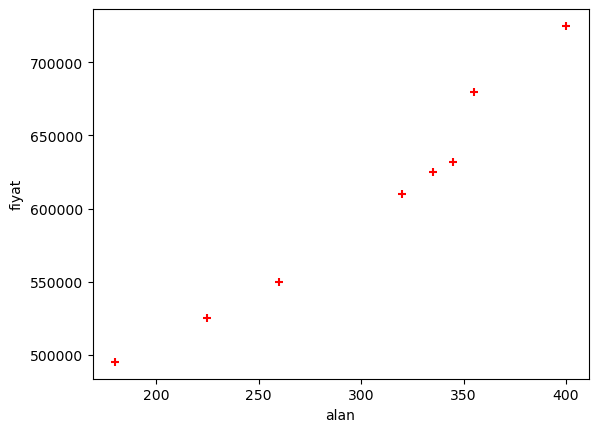

In [17]:
plt.xlabel("alan")
plt.ylabel("fiyat")
plt.scatter(df.alan,df.fiyat,color="red",marker="+") #scatter diyerek elimizdeki alan ve fiyat bilgilerini görmek istiyoruz


In [15]:
reg=linear_model.LinearRegression() #tahmin modelini oluşturduk
reg.fit(df[['alan']],df['fiyat']) #reg.fit diyerek modelin içine verilerimizi iletiyoruz
#reg.fit içinde soldaki verimiz x verisidir ve bağımsız değişkendir. bağımsız değişken sayısı;
#birden fazla olabilir o yüzden iki boyutlu array gibi tutmamız gerek
reg.predict([[275]]) #2 tane köşlei par. olmasının sebebi predict fonksiyonu iki boyutlu bir dizi veya dataframe bekler
#predict ile tahmin ettiriyoruz

C:\Users\90541\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([576826.14379085])

* önceki fiyatlara bakıp 275 mt2 lik alan için önerebileceği en iyi sayı buymuş. tahminimizi yaptık

* bu işlem aslında y=a+bx sonucunda dönmüşütür ve biz a ve b değerlerimizi ulabiliriz
* b değeri için reg.coef_ çalıştırılır
* a değeri için reg.intercept_ çalıştırılır

In [18]:
reg.coef_

array([1033.59477124])

In [19]:
reg.intercept_

292587.5816993463

* sağlamasını yaparsak;

In [20]:
a=reg.intercept_
b=reg.coef_
x=275
y=a+(b*x)
y

array([576826.14379085])

* aynı değeri döndürdüğünü görebiliriz

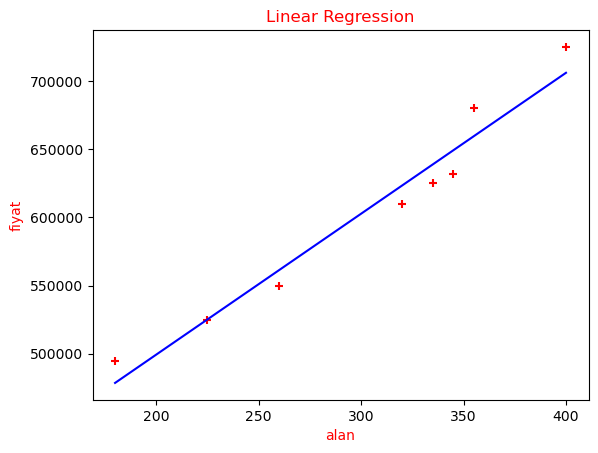

In [23]:
plt.xlabel("alan",color="red")
plt.ylabel("fiyat",color="red")
plt.title("Linear Regression",color="red")
plt.scatter(df.alan,df.fiyat,color="red",marker="+")
plt.plot(df.alan,reg.predict(df[["alan"]]),color="blue") #çizgi